1. En la primera celda se cargan las funciones que aparecen en la hoja. La última línea es importante porque es la que hace que las figuras aparezcan dentro de la hoja.

2. Si la salida (output) de una celda es demasiado grande, se crea una subventana con su propia barra lateral (scroll). Al ejecutar la segunda celda se deshabilita esa función y la figura aunque sea grande no aparece en una subventana. Esto permite ver la figura entera sin tener que arrastrar la barra lateral.

3. Las otras celdas contienen ejemplos (copiados de Internet) con los que conviene jugar modificando sus parámetros numéricos para entender qué es lo que cambia cada uno. Estos ejemplos utilizan Matplotlib, una librería de funciones gráficas en Python, que permite generar gráficos 3D interactivos de calidad suficiente. El código para generar los ejemplos es bastante más complicado que el que usaba Sage con el notebook antiguo, que no funciona en Jupyter. 

4. Esta hoja se ha guardado sin las gráficas para ahorrar espacio (Cell>All Output>Clear). Una hoja con gráficas puede llegar a ocupar 50-100 MBs en disco, que multiplicado por los más de 200 usuarios son  bastantes GBs. **Hay que guardar las hojas sin los gráficos, dejando únicamente el código.** 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *
%matplotlib notebook

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


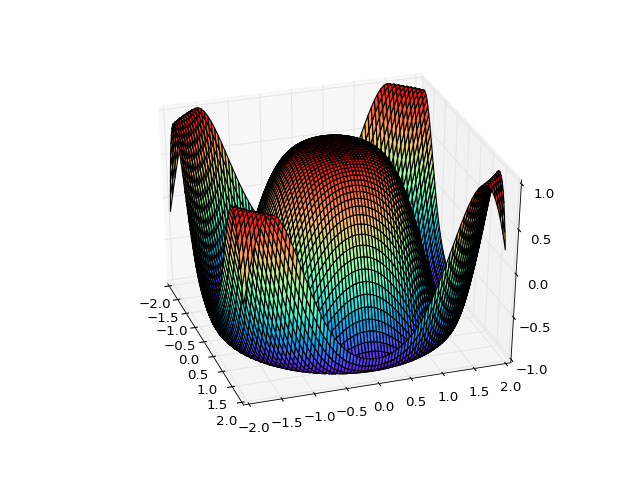

In [3]:
x = np.arange(-2,2,0.05)
y = np.arange(-2,2,0.05)
X,Y = np.meshgrid(x, y)

def f(x,y):
    return np.cos(x**2+y**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
zs = np.array([f(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
ax.plot_surface(X,Y,Z, cmap=plt.cm.rainbow,rstride=1, cstride=1)

fig.savefig('superficie.png')

<IPython.core.display.Javascript object>


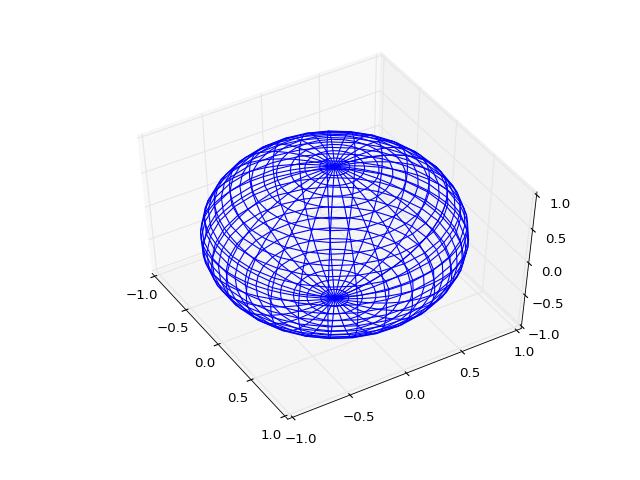

In [4]:
u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

x = np.outer(np.sin(u), np.sin(v))
y = np.outer(np.sin(u), np.cos(v))
z = np.outer(np.cos(u), np.ones_like(v))


fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_wireframe(x, y, z)


In [8]:
def plot_implicit(fn, bbox=(-2.5,2.5)):
    ''' create a plot of an implicit function
    fn  ...implicit function (plot where fn==0)
    bbox ..the x,y,and z limits of plotted interval'''
    xmin, xmax, ymin, ymax, zmin, zmax = bbox*3
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    A = np.linspace(xmin, xmax, 100) # resolution of the contour
    B = np.linspace(xmin, xmax, 15) # number of slices
    A1,A2 = np.meshgrid(A,A) # grid on which the contour is plotted

    for z in B: # plot contours in the XY plane
        X,Y = A1,A2
        Z = fn(X,Y,z)
        cset = ax.contour(X, Y, Z+z, [z], zdir='z')
        # [z] defines the only level to plot for this contour for this value of z

    for y in B: # plot contours in the XZ plane
        X,Z = A1,A2
        Y = fn(X,y,Z)
        cset = ax.contour(X, Y+y, Z, [y], zdir='y')

    for x in B: # plot contours in the YZ plane
        Y,Z = A1,A2
        X = fn(x,Y,Z)
        cset = ax.contour(X+x, Y, Z, [x], zdir='x')

    # must set plot limits because the contour will likely extend
    # way beyond the displayed level.  Otherwise matplotlib extends the plot limits
    # to encompass all values in the contour.
    ax.set_zlim3d(zmin,zmax)
    ax.set_xlim3d(xmin,xmax)
    ax.set_ylim3d(ymin,ymax)

    #plt.show()

<IPython.core.display.Javascript object>


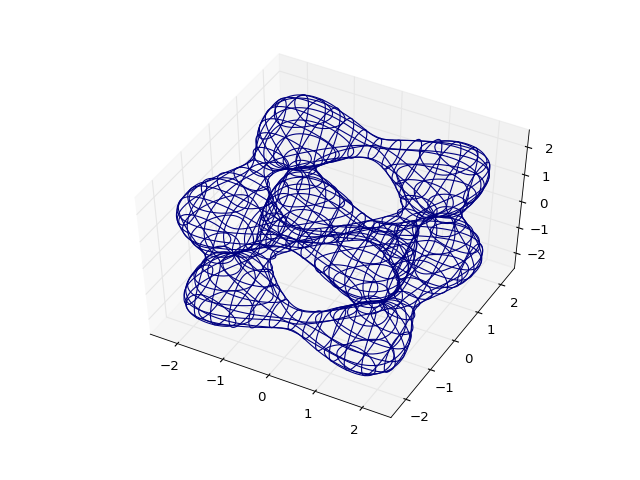

In [7]:
def goursat_tangle(x,y,z):
    a,b,c = 0.0,-5.0,11.8
    return x**4+y**4+z**4+a*(x**2+y**2+z**2)**2+b*(x**2+y**2+z**2)+c

plot_implicit(goursat_tangle)

<IPython.core.display.Javascript object>


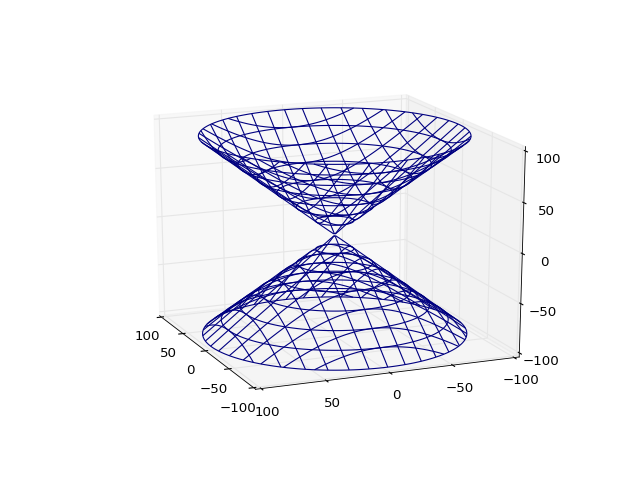

In [6]:
def hyp_part1(x,y,z):
    return -(x**2) - (y**2) + (z**2) - 1

plot_implicit(hyp_part1, bbox=(-100.,100.))
